In [1]:
from causal_ccm.causal_ccm import ccm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [18]:
df_us_tweets = pd.read_csv('us_states_tweet_count.csv')
df_us_shortage = pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW_.csv')

In [19]:
df_us_shortage['date'] = df_us_shortage['date'].apply(lambda d: d.replace('/', '-'))

In [20]:
df_us_tweets

,date_time,neg,neutral,pos,sum,prop_neg,prop_pos,prop_neutral,state
0,2020-02-01,13,4,0,17,0.764706,0.000000,0.235294,Alabama
1,2020-02-02,29,11,2,42,0.690476,0.047619,0.261905,Alabama
2,2020-02-03,39,8,2,49,0.795918,0.040816,0.163265,Alabama
3,2020-02-04,20,6,0,26,0.769231,0.000000,0.230769,Alabama
4,2020-02-05,32,17,3,52,0.615385,0.057692,0.326923,Alabama
...,...,...,...,...,...,...,...,...,...
20841,2021-03-27,158,54,21,233,0.678112,0.090129,0.231760,Wyoming
20842,2021-03-28,68,134,16,218,0.311927,0.073394,0.614679,Wyoming
20843,2021-03-29,56,161,20,237,0.236287,0.084388,0.679325,Wyoming
20844,2021-03-30,109,117,112,338,0.322485,0.331361,0.346154,Wyoming


In [21]:
df_us_shortage

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,Demo | State Geographic Boundaries
0,KS,2021-03-31,12,134,4,14,132,4,0.0,147,...,0,NaN,0,NaN,0,62.0,147,226.0,147,NaN
1,AK,2021-03-30,1,21,0,2,20,0,0.0,22,...,0,NaN,0,NaN,0,47.0,22,66.0,22,NaN
2,NV,2021-03-29,0,1,59,0,1,59,26.0,58,...,0,NaN,0,NaN,0,0.0,1,0.0,1,NaN
3,MA,2021-03-24,10,90,1,9,91,1,25.0,100,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
4,RI,2021-03-22,4,9,2,4,9,2,7.0,14,...,0,NaN,0,NaN,0,69.0,14,96.0,14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65076,VT,2021-05-30,1,15,1,1,15,1,0.0,16,...,0,NaN,0,NaN,0,17.0,1,33.0,1,NaN
65077,MO,2021-05-21,23,98,19,27,94,19,8.0,136,...,0,NaN,0,NaN,0,620.0,136,875.0,136,NaN
65078,ME,2021-04-17,0,30,9,1,29,9,0.0,38,...,0,NaN,0,NaN,0,27.0,31,27.0,31,NaN
65079,NC,2021-06-07,5,110,4,7,108,4,10.0,115,...,0,NaN,0,NaN,0,283.0,115,389.0,115,NaN


In [22]:
sorted(df_us_tweets['date_time'].unique())

['2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-

In [23]:
sorted(df_us_shortage['date'].unique())

['2020-01-01',
 '2020-01-02',
 '2020-01-03',
 '2020-01-04',
 '2020-01-05',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-11',
 '2020-01-12',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-18',
 '2020-01-19',
 '2020-01-20',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-

In [38]:
# take the data from california
df_us_tweets_CA   = df_us_tweets.loc[
    (df_us_tweets['state'] == 'California') &
    (df_us_tweets['date_time'] >= '2020-03-01') &
    (df_us_tweets['date_time'] < '2020-11-01')
].sort_values('date_time')
df_us_shortage_CA = df_us_shortage.loc[
    (df_us_shortage['state'] == 'CA') &
    (df_us_shortage['date'] >= '2020-03-01') &
    (df_us_shortage['date'] < '2020-11-01')
].sort_values('date')

In [39]:
df_us_tweets_CA

,date_time,neg,neutral,pos,sum,prop_neg,prop_pos,prop_neutral,state
1697,2020-03-01,13352,3516,534,17402,0.767268,0.030686,0.202046,California
1698,2020-03-02,8294,3514,251,12059,0.687785,0.020814,0.291401,California
1699,2020-03-03,2650,2644,283,5577,0.475166,0.050744,0.474090,California
1700,2020-03-04,10193,8231,285,18709,0.544818,0.015233,0.439949,California
1701,2020-03-05,18256,6261,519,25036,0.729190,0.020730,0.250080,California
...,...,...,...,...,...,...,...,...,...
1929,2020-10-27,2068,4124,560,6752,0.306280,0.082938,0.610782,California
1930,2020-10-28,2796,3569,826,7191,0.388819,0.114866,0.496315,California
1931,2020-10-29,3107,2629,632,6368,0.487908,0.099246,0.412845,California
1932,2020-10-30,2254,2644,496,5394,0.417872,0.091954,0.490174,California


In [40]:
df_us_shortage_CA

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,Demo | State Geographic Boundaries
18450,CA,2020-03-01,0,0,1,0,0,1,0.0,1,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
14169,CA,2020-03-02,0,0,2,0,0,2,0.0,2,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
15265,CA,2020-03-03,0,0,2,0,0,2,0.0,2,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
13409,CA,2020-03-04,0,0,2,0,0,2,0.0,2,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
17403,CA,2020-03-05,0,0,2,0,0,2,0.0,2,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8294,CA,2020-10-27,55,319,19,77,297,19,14.0,385,...,0,NaN,0,0.0,37,2007.0,380,3374.0,380,NaN
10504,CA,2020-10-28,63,322,19,83,303,18,14.0,396,...,0,NaN,0,0.0,42,2118.0,392,3467.0,392,NaN
8547,CA,2020-10-29,55,333,20,77,312,19,14.0,400,...,0,NaN,0,0.0,2,2110.0,396,3494.0,396,NaN
2189,CA,2020-10-30,55,334,20,77,313,19,19.0,401,...,0,NaN,0,0.0,1,2169.0,397,3515.0,397,NaN


In [42]:
df_us_tweets_CA['date_time'].to_numpy()

array(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
       '2020-04-30', '2020-05-01', '2020-05-02', '2020-

In [41]:
df_us_shortage_CA['date'].to_numpy()

array(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
       '2020-04-30', '2020-05-01', '2020-05-02', '2020-

In [45]:
# some columns in the shortage data is not in the tweets data
np.setdiff1d(df_us_shortage_CA['date'].to_numpy(), df_us_tweets_CA['date_time'].to_numpy())

array(['2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19',
       '2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23'],
      dtype=object)

In [65]:
df_CA_merged = pd.merge(df_us_tweets_CA, df_us_shortage_CA, left_on='date_time', right_on='date', how='inner').drop('date_time', axis=1).sort_values('date')

In [66]:
df_CA_merged

,neg,neutral,pos,sum,prop_neg,prop_pos,prop_neutral,state_x,state_y,date,...,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,Demo | State Geographic Boundaries
0,13352,3516,534,17402,0.767268,0.030686,0.202046,California,CA,2020-03-01,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
1,8294,3514,251,12059,0.687785,0.020814,0.291401,California,CA,2020-03-02,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
2,2650,2644,283,5577,0.475166,0.050744,0.474090,California,CA,2020-03-03,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
3,10193,8231,285,18709,0.544818,0.015233,0.439949,California,CA,2020-03-04,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
4,18256,6261,519,25036,0.729190,0.020730,0.250080,California,CA,2020-03-05,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2068,4124,560,6752,0.306280,0.082938,0.610782,California,CA,2020-10-27,...,0,NaN,0,0.0,37,2007.0,380,3374.0,380,NaN
233,2796,3569,826,7191,0.388819,0.114866,0.496315,California,CA,2020-10-28,...,0,NaN,0,0.0,42,2118.0,392,3467.0,392,NaN
234,3107,2629,632,6368,0.487908,0.099246,0.412845,California,CA,2020-10-29,...,0,NaN,0,0.0,2,2110.0,396,3494.0,396,NaN
235,2254,2644,496,5394,0.417872,0.091954,0.490174,California,CA,2020-10-30,...,0,NaN,0,0.0,1,2169.0,397,3515.0,397,NaN


In [69]:
#np.nan_to_num(df_CA_merged['prop_neg'].to_numpy(), nan=0.0)
X = df_CA_merged['prop_neg'].to_numpy()
Y = df_CA_merged['inpatient_beds_used_covid'].to_numpy()

In [70]:
assert X.shape == Y.shape
assert np.count_nonzero(~np.isnan(X)) == np.count_nonzero(~np.isnan(Y))
assert np.count_nonzero(~np.isnan(X)) == X.shape[0]

In [91]:
# inputs
tau = 1 # time lag
E = 8 # shadow manifold embedding dimensions
L = len(X) # length of time period to consider

# if we wish to check if X causes Y
ccm1 = ccm(X, Y, tau, E, L)

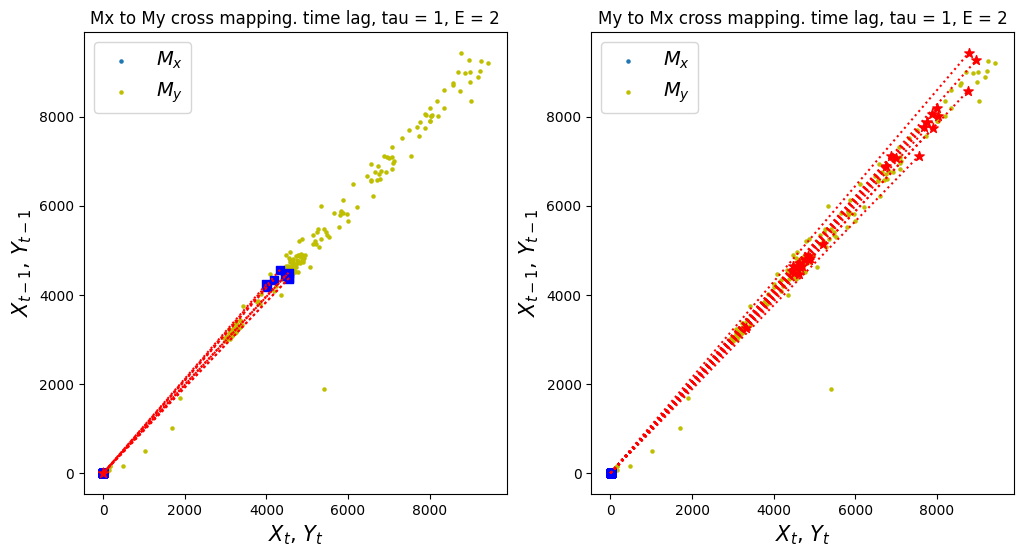

In [92]:
# visualize sample cross mapping
ccm1.visualize_cross_mapping()

In [93]:
# causality X -> Y
# returns: (correlation ("strength" of causality), p-value(significance))
corr_, p = ccm1.causality()
corr_, p

(0.507970698738303, 1.718493663416722e-16)

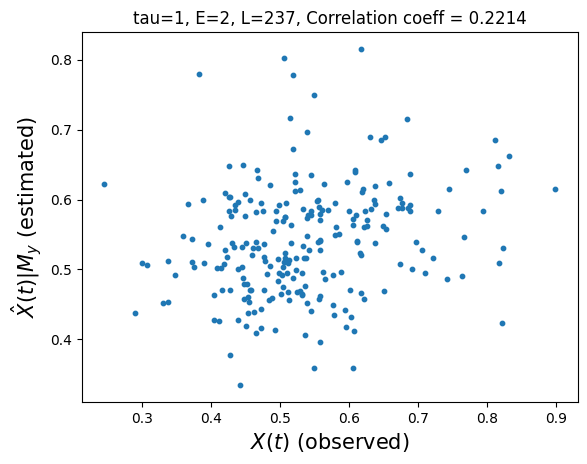

In [74]:
# visualize correlation of X->Y
# stronger correlation = stronger causal relationship
ccm1.plot_ccm_correls()

X->Y r 0.51 p value 0.0
Y->X r 0.35 p value 0.0


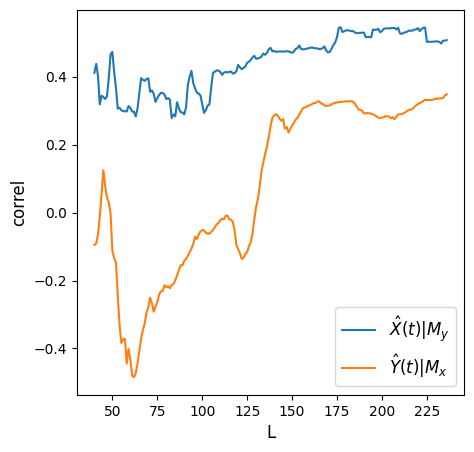

In [90]:
# checking convergence
# Looking at "convergence"
L_range = range(40, len(X), 1) # L values to test
tau = 1
E = 8

Xhat_My, Yhat_Mx = [], [] # correlation list
for L in L_range: 
    ccm_XY = ccm(X, Y, tau, E, L) # define new ccm object # Testing for X -> Y
    ccm_YX = ccm(Y, X, tau, E, L) # define new ccm object # Testing for Y -> X    
    Xhat_My.append(ccm_XY.causality()[0]) 
    Yhat_Mx.append(ccm_YX.causality()[0]) 
    
print('X->Y r', np.round(Xhat_My[-1], 2), 'p value', np.round(ccm_XY.causality()[1], 4))
print('Y->X r', np.round(Yhat_Mx[-1], 2), 'p value', np.round(ccm_YX.causality()[1], 4))    
    
# plot convergence as L->inf. Convergence is necessary to conclude causality
plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$')
plt.plot(L_range, Yhat_Mx, label='$\hat{Y}(t)|M_x$')
plt.xlabel('L', size=12)
plt.ylabel('correl', size=12)
plt.legend(prop={'size': 12})